In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [19]:
df= pd.read_csv("data.csv",encoding='latin1',parse_dates=['date'],dtype={'stn_code':str},dayfirst=True)
cols_to_drop = ['stn_code','sampling_date','agency','location_monitoring_station']
df.drop(cols_to_drop,axis=1,inplace=True)
city_df = pd.read_csv('city_day.csv',parse_dates=['Date'],dayfirst=True,index_col='Date')
city_df.head(2)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN


In [20]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [21]:
df.shape

(435742, 9)

In [22]:
df.date.nunique()

5067

In [25]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN,2015-12-24
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN,NaN,2015-12-29
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


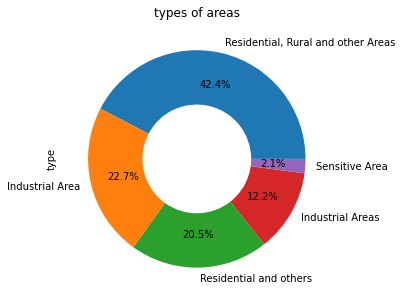

In [27]:
df['type'].value_counts().head().plot.pie(figsize=(5,5), 
                                            wedgeprops={'width':.5},
                                            radius=1,
                                            title="types of areas",
                                            autopct='%.1f%%',
                                            pctdistance =.7,
                                            textprops={'color':'black'})
plt.show()

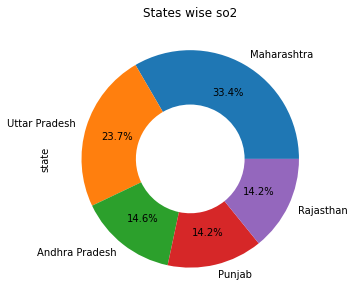

In [28]:
df['state'].value_counts().head().plot.pie(figsize=(5,5), 
                                            wedgeprops={'width':.5},
                                            radius=1,
                                            title="States wise so2",
                                            autopct='%.1f%%',
                                            pctdistance =.7,
                                            textprops={'color':'black'})
plt.show()

In [ ]:
df.set_index('date',inplace=True)

In [41]:
year_wise_df = df.resample('Y').mean()
px.bar(year_wise_df,x=year_wise_df.index,y='so2',title='Year wise SO2 concentration')


In [51]:
states_df = df.groupby(['state',df.index]).sum().reset_index()
state_df = states_df[states_df['state']=='West Bengal']
state_df = state_df.set_index('date')  
state_pollution = state_df.resample('Y').mean()

,state,date,so2,no2,rspm,spm,pm2_5
80513,West Bengal,1987-01-01,130.3,259.1,0.0,1947.0,0.0
80514,West Bengal,1987-01-03,76.5,31.5,0.0,268.0,0.0
80515,West Bengal,1987-01-04,45.8,123.3,0.0,1020.0,0.0
80516,West Bengal,1987-01-05,0.0,14.4,0.0,167.0,0.0
80517,West Bengal,1987-01-06,12.8,47.1,0.0,513.0,0.0


,so2,no2,rspm,spm,pm2_5
date,,,,,
1987-12-31,51.447619,98.021429,0.000000,639.404762,0.000000
1988-12-31,92.048000,152.276000,0.000000,698.080000,0.000000
1989-12-31,230.137500,380.250000,0.000000,1695.750000,0.000000
1990-12-31,244.241667,331.708333,0.000000,1959.250000,0.000000
1991-12-31,361.316667,420.458333,0.000000,2228.416667,0.000000
1992-12-31,169.541667,296.108333,0.000000,1255.916667,0.000000
1993-12-31,455.341667,684.133333,0.000000,129.833333,0.000000
1994-12-31,407.581818,944.681818,0.000000,2001.818182,0.000000
1995-12-31,450.266667,987.025000,0.000000,2415.666667,0.000000


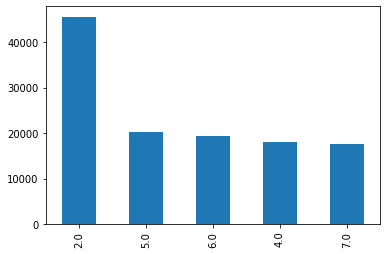

In [ ]:
df['so2'].value_counts().head().plot.bar()
plt.show()

In [ ]:
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

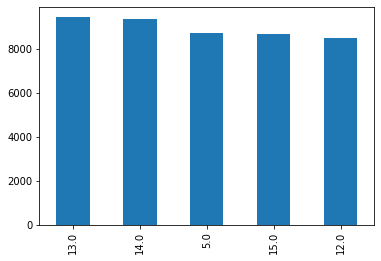

In [ ]:
df['no2'].value_counts().head().plot.bar()
plt.show()


In [ ]:
s=df['state'].value_counts()
a=df['so2'].value_counts()

In [ ]:
p=s.size
p

37

In [ ]:
q=a.size
q

4197

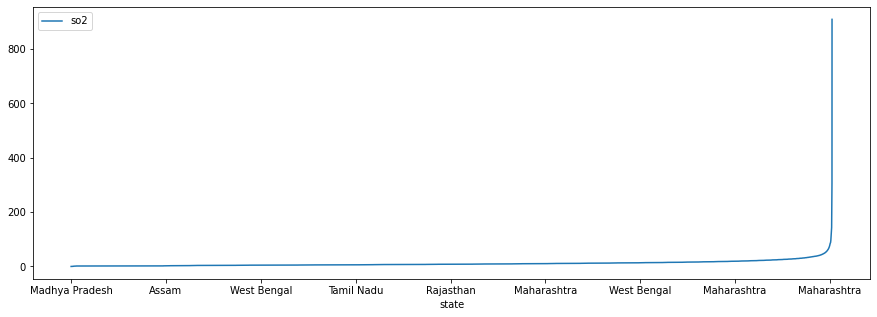

In [ ]:
df.plot.line(x='state',y='so2',figsize=(15,5))
plt.show()

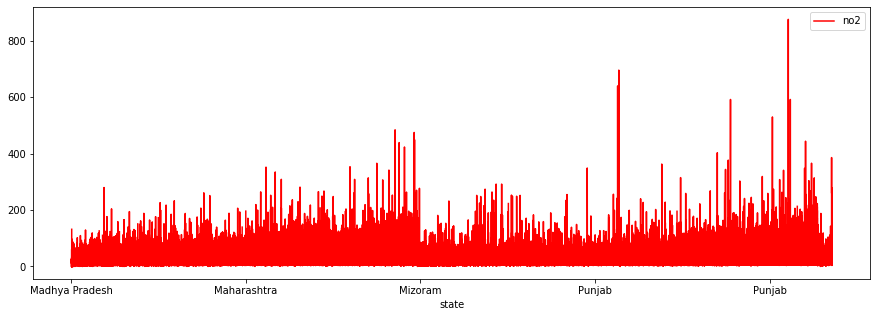

In [ ]:
df.plot.line(x='state',y='no2',figsize=(15,5),color='red')
plt.show()

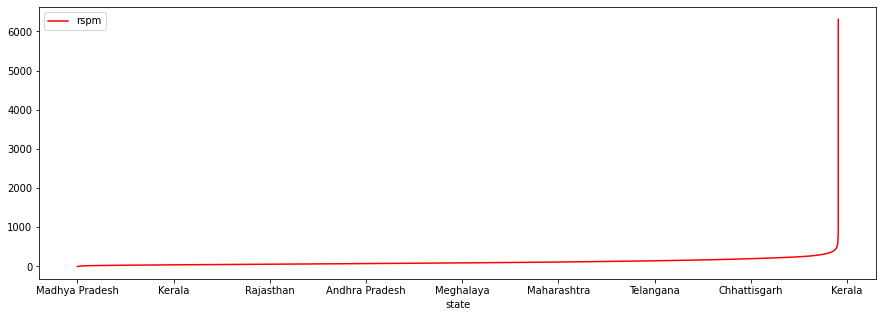

In [ ]:
df.plot.line(x='state',y='rspm',figsize=(15,5),color='red')
plt.show()


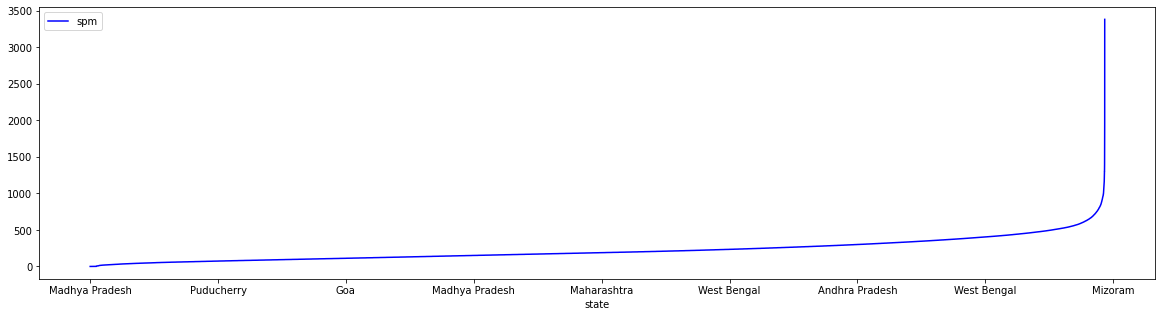

In [ ]:
df.plot.line(x='state',y='spm',figsize=(20,5),color='blue')
plt.show()

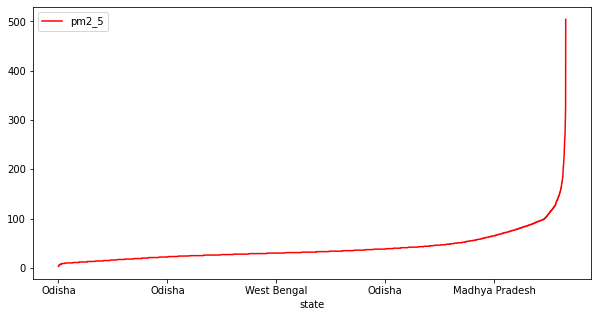

In [ ]:
df.plot.line(x='state',y='pm2_5',figsize=(10,5),color='red')
plt.show()


In [ ]:
df.sort_values(by='spm',inplace=True)

In [ ]:
df.sort_values(by='rspm',inplace=True)

In [ ]:
df.sort_values(by='pm2_5',inplace=True)

In [ ]:
df.state

177615                 Madhya Pradesh
82924                         Gujarat
74583                             Goa
82932                         Gujarat
82933                         Gujarat
                     ...             
433149                    West Bengal
433551                    West Bengal
435739    andaman-and-nicobar-islands
435740                    Lakshadweep
435741                        Tripura
Name: state, Length: 435742, dtype: object